## One-dimensional random walker
This script simulates and visualizes random walk processes for multiple entities, analyzing the resulting position distributions through Probability Density Functions (PDFs) and Cumulative Probability Functions (CPFs).

In [4]:
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

### Simulate a single random walk over N steps
Inputs:  
- ```Nsteps```: Number of steps in the walk 
- ```p_l```, ```p_r```, ```p_s```: Probabilities of moving left, right, or staying in place, respectively
Output:  An array representing the position of the entity at each step

In [ ]:
# Function to simulate a random walk
def random_walk(Nsteps, p_l, p_r, p_s):
    position=np.zeros(Nsteps)
    position[0]=0.0 # Set the start position
    #Loop over the steps of a single walk
    for i in range(1, Nsteps):
        rand = np.random.random()
        if rand < p_l:  # Walk to the left
            position[i]=position[i-1]-1
        elif rand < p_r + p_l: # Walk to the right
            position[i]=position[i-1]+1
        else: # Stay
            position[i]=position[i-1]
    return position

### Simulate random walks for independent entities
Inputs:  
- ```Nentities```: Number of entities (independent random walks)
- ```Nsteps```: Number of steps per entity 
- ```p_l```, ```p_r```, ```p_s```: Probabilities of moving left, right, or staying in place, respectively
Output:  A 2D array where each row represents the position of an entity over time

In [ ]:
# Function to simulate multiple random walk
def simulate_entities(Nentities, Nsteps, p_l, p_r, p_s):
    all_positions = np.zeros((Nentities, Nsteps)) # Set the start position of each entity
    #Simulate random walk for each entity
    for i in range(Nentities):
        all_positions[i, :] = random_walk(Nsteps, p_l, p_r, p_s)
    return all_positions

### Visualize the results of the random walks using PDF (Probability Density Function) and CPF (Cumulative Probability Function)
Inputs:  
- ```positions```: A 2D array of all entities' positions over time
- ```Nsteps_list```: A list of time steps to analyze (e.g., [10, 100, 1000])
- ```title```: Title describing the probability parameters used

In [92]:
# Function to display PDF and CPF
def display_plot(positions, Nsteps_list, title):
    plt.figure(figsize=(15, 6))    
    # Plot PDF
    plt.subplot(1, 2, 1)
    for Nsteps in Nsteps_list:
        final_positions = positions[:, Nsteps-1]  # Get the location at the final step 
        plt.hist(final_positions, bins=25, density=True, alpha=0.8, label=f't = {Nsteps}')
    plt.title(f'PDF for {title}')
    plt.xlabel('Position')
    plt.ylabel('Probability Density')
    plt.legend()
    # Plot CPF
    plt.subplot(1, 2, 2)
    for Nsteps in Nsteps_list:
        final_positions = positions[:, Nsteps-1]  # Get the location at the final step
        sorted_positions = np.sort(final_positions)
        cdf = np.linspace(0, 1, len(final_positions)) # Calculate cumulative probability
        plt.plot(sorted_positions, cdf, label=f't = {Nsteps}')
    plt.title(f'CPF for {title}')
    plt.xlabel('Position')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

### Simulate random walks for multiple entities under different movement probability conditions and visualizes the results using PDFs and CPFs

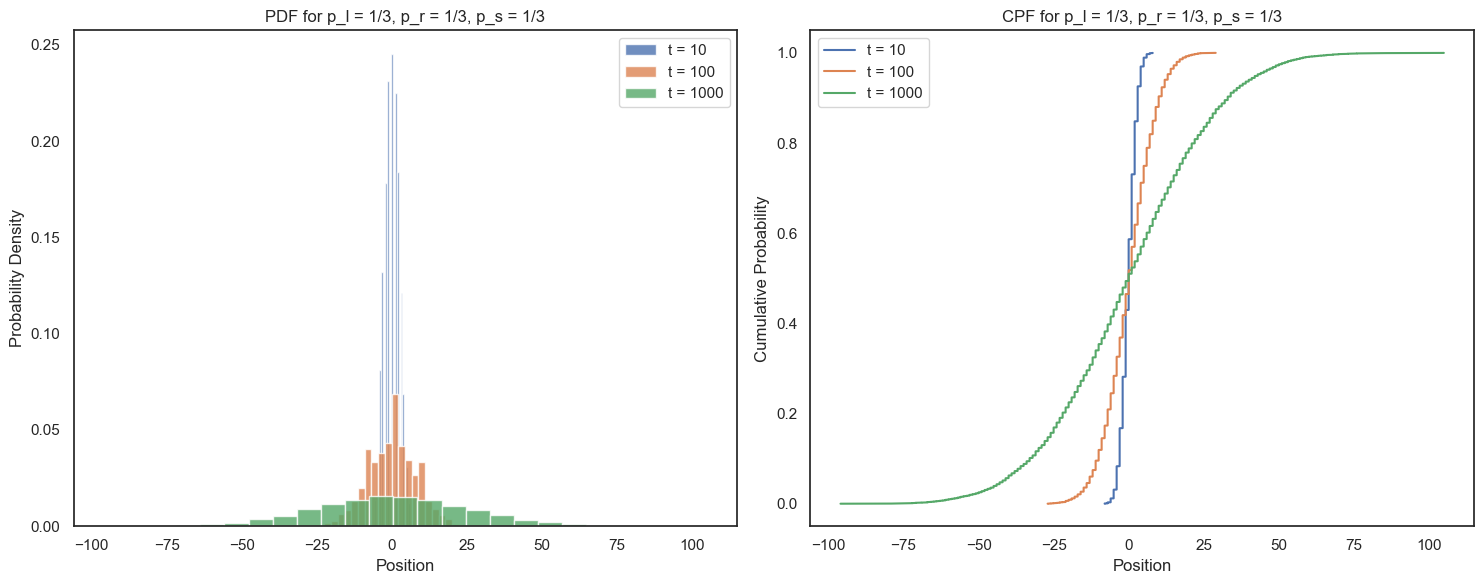

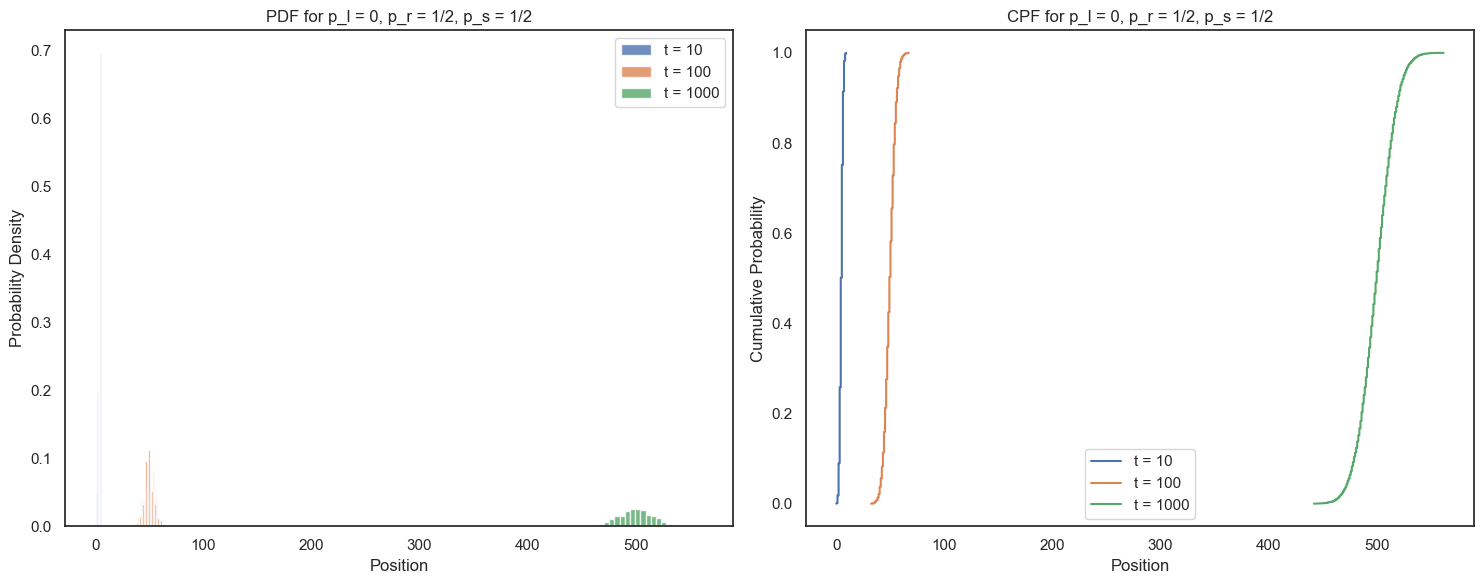

In [98]:
Nentities = 10000
Nsteps_list = [10, 100, 1000]
# By simulating the random walk up to this maximum, the results for smaller step counts can be extracted as intermediate steps
positions = simulate_entities(Nentities, max(Nsteps_list), 1/3, 1/3, 1/3)
display_plot(positions, Nsteps_list, 'p_l = 1/3, p_r = 1/3, p_s = 1/3')
positions = simulate_entities(Nentities, max(Nsteps_list), 0, 1/2, 1/2)
display_plot(positions, Nsteps_list, 'p_l = 0, p_r = 1/2, p_s = 1/2')